# Examen Parcial 3 - Práctico
## Modelos Computacionales II
### Estela Gil Villegas Guevara

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import shutil
import random
import pandas as pd
from PIL import Image
import glob
import cv2

### Parte I 
Obtener clases del dataset Brain Tumor, y mover imágenes acorde a su clasificación (tumor / no_tumor) para los datos de entrenamiento y validación

In [52]:
dataset_path = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\sexto_sem\modelos_python\Neurociencias-2025-2\S03_datasets\Brain_tumor" # ruta al dataset de brain tumor"
csv_path = os.path.join(dataset_path, "Brain Tumor.csv")

train_dir = os.path.join(dataset_path, "TRAIN") # dir entrenamiento
val_dir = os.path.join(dataset_path, "VAL") # dir validación

# dir de destino en train
tumor_dir = os.path.join(train_dir, "tumor")
no_tumor_dir = os.path.join(train_dir, "no_tumor")

# dir de destino en validación
tumor_val_dir = os.path.join(val_dir, "tumor")
no_tumor_val_dir = os.path.join(val_dir, "no_tumor")

for folder in [tumor_dir, no_tumor_dir, tumor_val_dir, no_tumor_val_dir]:
    os.makedirs(folder, exist_ok=True) # crear carpetas

In [61]:
for _, row in df.iterrows():
    image_name = row["Image"] + ".jpg"  
    class_label = str(row["Class"]) 

    # Ruta original de la imagen
    src_train_path = os.path.join(train_dir, image_name)
    src_val_path = os.path.join(val_dir, image_name)

    if os.path.exists(src_train_path):
        dst_path = os.path.join(tumor_dir if class_label == "1" else no_tumor_dir, image_name)
        shutil.move(src_train_path, dst_path)
    elif os.path.exists(src_val_path):  # Mover imágenes de validación
        dst_path = os.path.join(tumor_val_dir if class_label == "1" else no_tumor_val_dir, image_name)
        shutil.move(src_val_path, dst_path)
    else:
        print(f"⚠️ Imagen no encontrada: {image_name}")

print("✅ Imágenes organizadas exitosamente en TRAIN y VAL.") 

⚠️ Imagen no encontrada: Image1.jpg
⚠️ Imagen no encontrada: Image2.jpg
⚠️ Imagen no encontrada: Image3.jpg
⚠️ Imagen no encontrada: Image4.jpg
⚠️ Imagen no encontrada: Image5.jpg
⚠️ Imagen no encontrada: Image6.jpg
⚠️ Imagen no encontrada: Image7.jpg
⚠️ Imagen no encontrada: Image8.jpg
⚠️ Imagen no encontrada: Image9.jpg
⚠️ Imagen no encontrada: Image10.jpg
⚠️ Imagen no encontrada: Image11.jpg
⚠️ Imagen no encontrada: Image12.jpg
⚠️ Imagen no encontrada: Image18.jpg
⚠️ Imagen no encontrada: Image23.jpg
⚠️ Imagen no encontrada: Image26.jpg
⚠️ Imagen no encontrada: Image27.jpg
⚠️ Imagen no encontrada: Image30.jpg
⚠️ Imagen no encontrada: Image32.jpg
⚠️ Imagen no encontrada: Image33.jpg
⚠️ Imagen no encontrada: Image34.jpg
⚠️ Imagen no encontrada: Image44.jpg
⚠️ Imagen no encontrada: Image45.jpg
⚠️ Imagen no encontrada: Image49.jpg
⚠️ Imagen no encontrada: Image53.jpg
⚠️ Imagen no encontrada: Image57.jpg
⚠️ Imagen no encontrada: Image59.jpg
⚠️ Imagen no encontrada: Image60.jpg
⚠️ Imagen 

In [55]:
df = pd.read_csv(csv_path)
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [60]:
import os
print("Imágenes en VAL (sin clasificar):", os.listdir(val_dir))

Imágenes en VAL (sin clasificar): ['Image1000.jpg', 'Image1007.jpg', 'Image1018.jpg', 'Image1019.jpg', 'Image1023.jpg', 'Image1028.jpg', 'Image1030.jpg', 'Image1033.jpg', 'Image1035.jpg', 'Image1048.jpg', 'Image1054.jpg', 'Image1068.jpg', 'Image1072.jpg', 'Image1075.jpg', 'Image1079.jpg', 'Image1081.jpg', 'Image109.jpg', 'Image1090.jpg', 'Image1092.jpg', 'Image1095.jpg', 'Image1098.jpg', 'Image1105.jpg', 'Image1106.jpg', 'Image1107.jpg', 'Image1109.jpg', 'Image1111.jpg', 'Image1114.jpg', 'Image1117.jpg', 'Image1118.jpg', 'Image112.jpg', 'Image1129.jpg', 'Image1133.jpg', 'Image1136.jpg', 'Image1147.jpg', 'Image1150.jpg', 'Image1160.jpg', 'Image1162.jpg', 'Image1164.jpg', 'Image1172.jpg', 'Image1175.jpg', 'Image1176.jpg', 'Image1179.jpg', 'Image1186.jpg', 'Image1188.jpg', 'Image1193.jpg', 'Image1205.jpg', 'Image1214.jpg', 'Image1223.jpg', 'Image1227.jpg', 'Image1232.jpg', 'Image1234.jpg', 'Image1235.jpg', 'Image1238.jpg', 'Image1243.jpg', 'Image125.jpg', 'Image1252.jpg', 'Image1256.jpg',

## Parte II 
Sacar modelo de CNN

In [69]:
# definir el modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

In [88]:
# cargar y preparar imágenes desde sus directorios
from tensorflow.keras.preprocessing import image_dataset_from_directory
datagen = ImageDataGenerator(rescale=1./255)

train_dataset = image_dataset_from_directory(
    train_dir, image_size=(128, 128), batch_size=32)

val_dataset = image_dataset_from_directory(
    val_dir, image_size=(128, 128), batch_size=32)

Found 3762 files belonging to 2 classes.
Found 565 files belonging to 2 classes.


In [87]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compilar modelo

from keras.preprocessing.image import load_img
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10) # entrenar (10 epocas)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.6872 - loss: 36.9245 - val_accuracy: 0.8195 - val_loss: 0.3980
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8040 - loss: 0.4549 - val_accuracy: 0.8690 - val_loss: 0.3248
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8370 - loss: 0.3658 - val_accuracy: 0.8938 - val_loss: 0.2554
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - accuracy: 0.8453 - loss: 0.3337 - val_accuracy: 0.9115 - val_loss: 0.2076
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - accuracy: 0.8964 - loss: 0.2441 - val_accuracy: 0.9646 - val_loss: 0.1267
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.9173 - loss: 0.2108 - val_accuracy: 0.9558 - val_loss: 0.1184
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.9343 - loss: 0.1637 - val_accuracy: 0.9681 - val_loss: 0.0900
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.9370 - loss: 

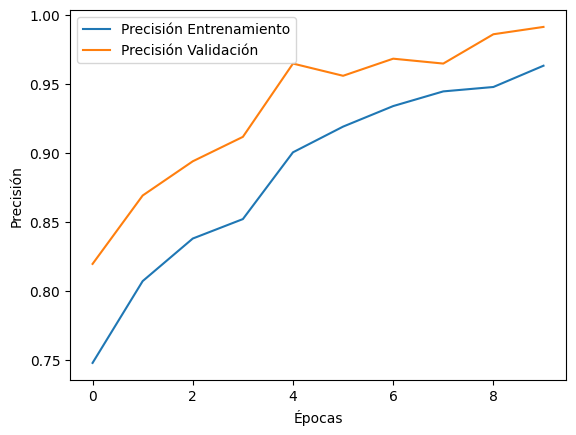

In [89]:
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Parte III
Sacar medidas para distintas épocas y número de capas

In [91]:
# modelo 1 => 2 capas convolucionales
model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [92]:
# modelo 2 => 3 capas convolucionales
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [93]:
# modelo 3 => más capas y + neuronas
model3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [95]:
# dar distintas épocas para cada modelo
models = [model1, model2, model3]
epochs_list = [15, 20, 30]
results = []

for model, num_epochs in zip(models, epochs_list):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs)
    
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    results.append((num_epochs, final_train_acc, final_val_acc))

Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.9481 - loss: 0.1412 - val_accuracy: 0.9752 - val_loss: 0.0809
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.9543 - loss: 0.1275 - val_accuracy: 0.9894 - val_loss: 0.0424
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.9566 - loss: 0.1109 - val_accuracy: 0.9717 - val_loss: 0.0815
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.9711 - loss: 0.0966 - val_accuracy: 0.9788 - val_loss: 0.0505
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.9696 - loss: 0.0954 - val_accuracy: 0.9858 - val_loss: 0.0372
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.9663 - loss: 0.0938 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.9774 - loss: 0.0775 - val_accuracy: 0.9929 - val_loss: 0.0299
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.9835 - loss: 0

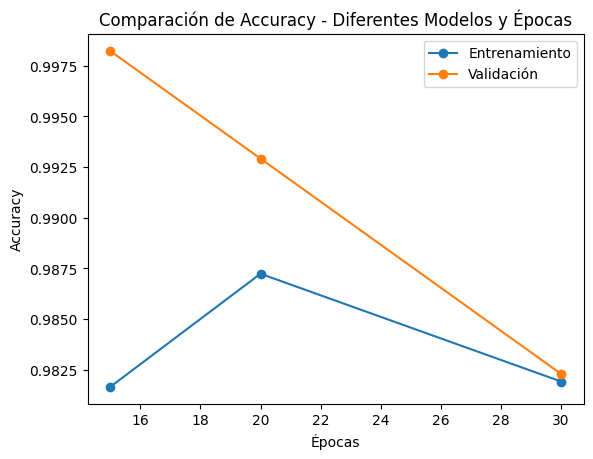

In [97]:
import matplotlib.pyplot as plt

epochs = [r[0] for r in results]
train_acc = [r[1] for r in results]
val_acc = [r[2] for r in results]

plt.plot(epochs, train_acc, label="Entrenamiento", marker="o")
plt.plot(epochs, val_acc, label="Validación", marker="o")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Comparación de Accuracy - Diferentes Modelos y Épocas")
plt.show()

Este análisis del accuracy dependiendo el número de épocas demuestra, en este caso, que hay un mejor rendimiento a las 20 épocas, y este declina conforme se aumentan (hasta 30)

## Parte IV 
Comparar con otros modelos 

In [106]:
import os

train_tumor_files = os.listdir(os.path.join(train_dir, "tumor"))
extensions = set([f.split(".")[-1] for f in train_tumor_files])
print("Extensiones detectadas en TRAIN/tumor:", extensions)

Extensiones detectadas en TRAIN/tumor: {'jpg'}


In [111]:
train_dir = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\sexto_sem\modelos_python\Neurociencias-2025-2\S03_datasets\Brain_tumor\TRAIN"
val_dir = r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\sexto_sem\modelos_python\Neurociencias-2025-2\S03_datasets\Brain_tumor\VAL"

In [116]:
# evalué si tensor flow estaba detectando y leyendo bien los datos del dataset
train_dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=(128, 128), batch_size=32
)
print("Número de clases detectadas:", len(train_dataset_test.class_names))
print("Clases detectadas:", train_dataset_test.class_names)

Found 3762 files belonging to 2 classes.
Número de clases detectadas: 2
Clases detectadas: ['no_tumor', 'tumor']


In [120]:
# me marcaba error al cargar los datos con image_dataset_from_directory, utilicé esta alternativa:

image_paths = glob.glob(os.path.join(train_dir, "tumor", "*.jpg")) # obtener las rutas
images = [cv2.imread(img) for img in image_paths] # cargar imágenes de forma manual
print(f" se cargaron {len(images)} imágenes manualmente con OpenCV")

 se cargaron 1683 imágenes manualmente con OpenCV


In [121]:
def load_images_with_opencv(directory, label): # función => carga imágenes y las convierte en arrays
    image_paths = glob.glob(os.path.join(directory, "*.jpg"))  # busca las imgs
    images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in image_paths]  # carga escala de grises
    images_resized = [cv2.resize(img, (128, 128)).flatten() for img in images]  # aplana
    
    return np.array(images_resized), np.array([label] * len(images_resized))  # regresa matriz

# imágenes de train
train_tumor, labels_tumor = load_images_with_opencv(os.path.join(train_dir, "tumor"), 1)
train_no_tumor, labels_no_tumor = load_images_with_opencv(os.path.join(train_dir, "no_tumor"), 0)

# unión de datasets
X_train = np.vstack((train_tumor, train_no_tumor))  # matriz de imgs
y_train = np.concatenate((labels_tumor, labels_no_tumor))  # labels

print(f"dataset listo: {X_train.shape}")

dataset listo: (3762, 16384)


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# dividir en train y test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# modelos clásicos
models = {
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Bosques Aleatorios": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear")
}

# entrenamiento
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  ¿
    y_pred = model.predict(X_val) 
    acc = accuracy_score(y_val, y_pred) 
    results[name] = acc

print("Resultados de modelos clásicos:", results)

Resultados de modelos clásicos: {'Árbol de Decisión': 0.8831341301460823, 'Bosques Aleatorios': 0.9468791500664011, 'SVM': 0.899070385126162}


De los tres modelos clásicos usados, el que tuvo mejor accuracy fue Bosques Aleatorios (0.94); sin embargo, las CNN tuvieron un mayor desempeño con 20 épocas (accuracy del 0.98 aproximadamente), lo cual nos podría sugerir que es mejor para este tipo de análisis. 